# AI Bauchi 6 Weeks Computer Vision Bootcamp

<div style="display: flex; justify-content: space-evenly; align-items: center; width: 100%;">
<img src="../../logos\aib.png" width='100px'/>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQeyMRtudTwUIhRHGT1VKvVbnRYTu8VaQtaHg&s" width='100px'/>
<img src="https://miro.medium.com/v2/resize:fit:800/0*qa3Uh-1JZUhCuBVK.png" width='100px'/>
</div>

---

### Session 13: Image Segmentation

- **Instructor**: [Nathaniel Handan](https://www.github.com/Tinny-Robot)
- **Date**: 12th August, 2024
- **Course**: Computer Vision Bootcamp

---


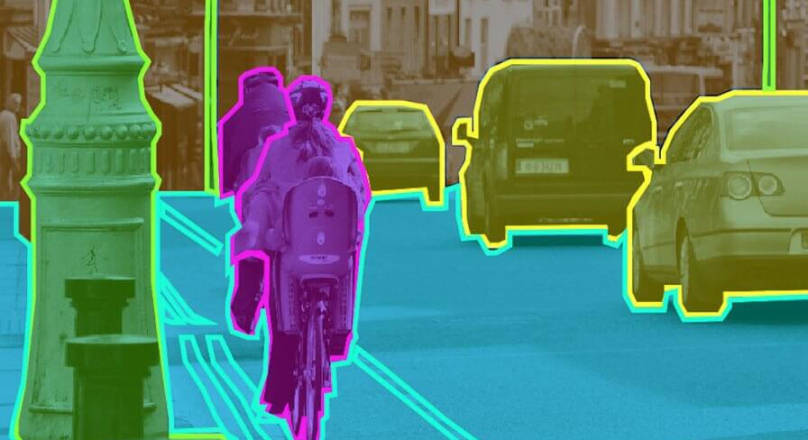

In this session, we will be looking at **Image Segmentation.** 


**Definition:**
Image segmentation is the process of partitioning an image into multiple segments. The goal of segmentation is to simplify and/or change the representation of an image into something that is more meaningful and easier to analyze. Image segmentation is typically used to locate objects and boundaries (lines, curves, etc.) in images. More precisely, image segmentation is the process of assigning a label to every pixel in an image such that pixels with the same label share certain characteristics.

**Applications of Image Segmentation:**
- Object detection and recognition
- Medical imaging (CT scans, MRI)
- Autonomous driving (Lane detection)
- Image compression
- Face detection and recognition

### Techniques for Image Segmentation

1. **Thresholding**

Thresholding as previously discussed is a simple segmentation technique that involves setting a threshold value and classifying each pixel as either foreground or background based on the intensity of the pixel.

(275, 183)


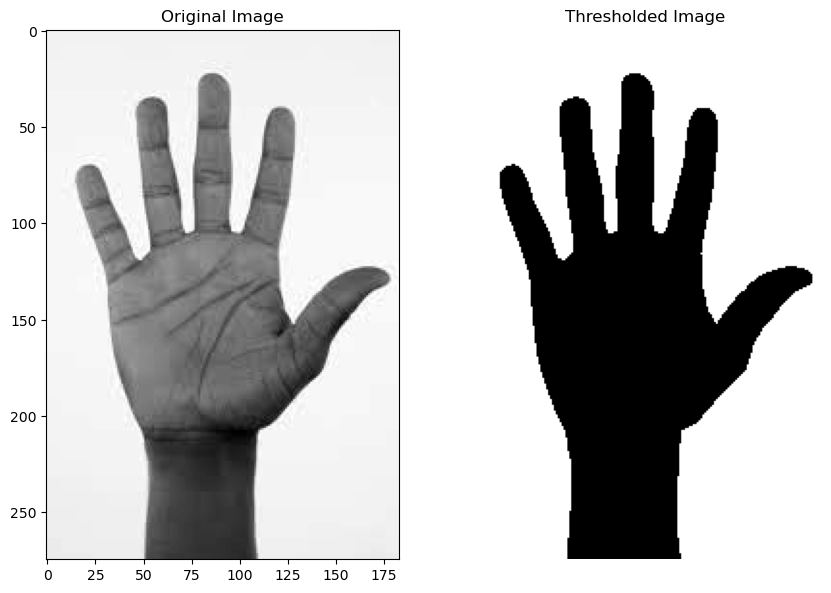

In [5]:
## Example of image thresholding using OpenCV
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
img = cv2.imread('images/hand.jpeg', cv2.IMREAD_GRAYSCALE)

# Apply a threshold (otsu thresholding)
ret, img_thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the original image
plt.figure(figsize=[10,10])
plt.subplot(121);plt.imshow(img, cmap='gray');plt.title("Original Image")
plt.subplot(122);plt.imshow(img_thresh, cmap='gray');plt.title("Thresholded Image")
plt.axis('off')
plt.show()


2. **Clustering-Based Segmentation**

- **K-Means Clustering**: K-means clustering is an unsupervised learning algorithm that groups similar data points into clusters. It is used in image segmentation to group pixels with similar intensity values into clusters.

- **Steps:**
    - Choose the number of clusters (K)
    - Initialize the centroids of the clusters
    - Assign each pixel to the nearest cluster
    - Update the centroids of the clusters
    - Repeat steps 3 and 4 until convergence

- **Applications:**
    - Color-based image segmentation
    - Image compression 
    


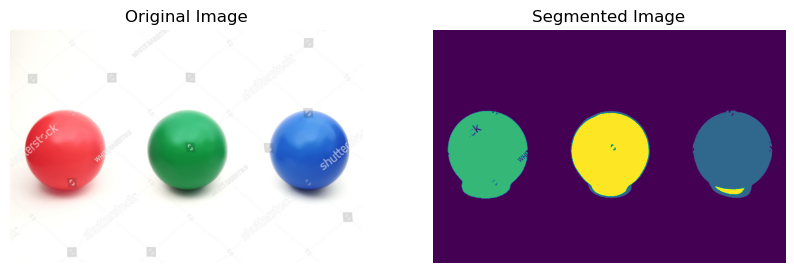

In [7]:
# applying k-means clustering segmentation
from sklearn.cluster import KMeans
img = cv2.imread('images/balls.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Reshape the image to be a list of pixels
pixels = img.reshape(-1, 3)

# Fit the KMeans model to the data
kmeans = KMeans(n_clusters=4).fit(pixels)

# Get the cluster assignments
clusters = kmeans.labels_

# Get the cluster centers
centers = kmeans.cluster_centers_

# Reshape the cluster assignments to an image
img_seg = clusters.reshape(img.shape[:2])

# Display the original image
plt.figure(figsize=[10,10])
plt.subplot(121);plt.imshow(img);plt.title("Original Image")
plt.axis('off')
plt.subplot(122);plt.imshow(img_seg);plt.title("Segmented Image")
plt.axis('off')
plt.show()


3. **Edge-Based Segmentation**

- **Concept:** Edge-based segmentation involves detecting edges in an image and using these edges to segment the image. Edges are points in an image where the intensity changes abruptly.

- **Techniques:**
    - **Sobel Operator:** The Sobel operator is used to detect edges in an image. It computes the gradient of the image intensity at each pixel.
    - **Canny Edge Detection:** The Canny edge detection algorithm is a multi-step process that involves detecting edges, thinning the edges, and thresholding the edges.

- **Applications:**
    - Object detection
    - Image enhancement
    - Image compression

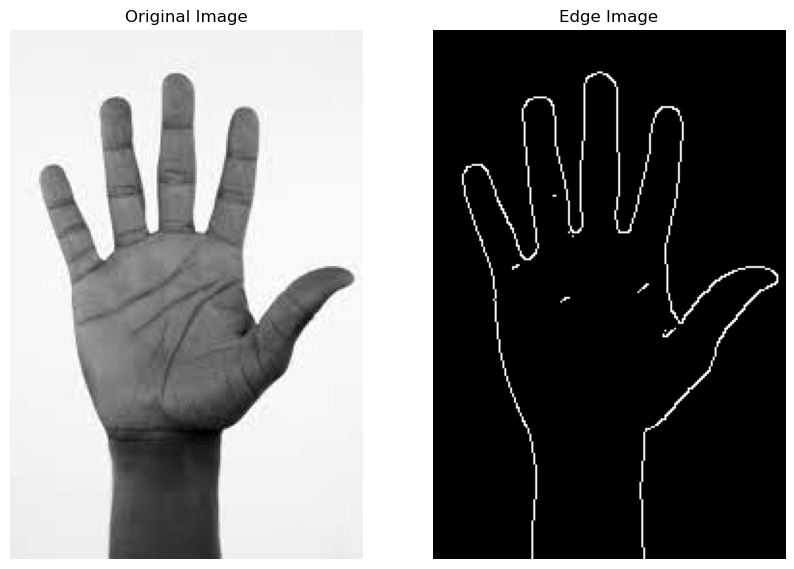

In [12]:
## Edge detection based segmentation
# Load an image
img = cv2.imread('images/hand.jpeg', cv2.IMREAD_GRAYSCALE)

# Apply Canny edge detection
img_edges = cv2.Canny(img, 170, 200)

# Display the original image
plt.figure(figsize=[10,10])
plt.subplot(121);plt.imshow(img, cmap='gray');plt.title("Original Image")
plt.axis('off')
plt.subplot(122);plt.imshow(img_edges, cmap='gray');plt.title("Edge Image")
plt.axis('off')
plt.show()


4. **Watershed Segmentation**

- **Concept:** Watershed segmentation is a region-based segmentation technique that treats the image as a topographic surface and segments the image based on the topography.

- **Steps:**
    - Compute the gradient of the image
    - Compute the markers for the watershed transform
    - Apply the watershed transform
    

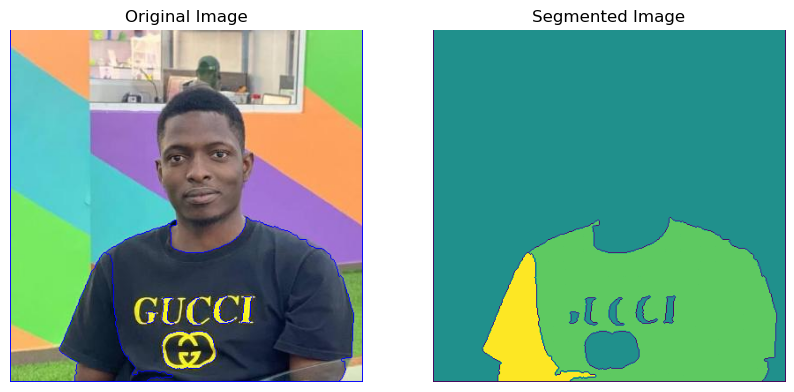

In [26]:
# Load the image
image = cv2.imread('images/image.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Noise removal using Morphology
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Mark the region of unknown with zero
markers[unknown == 255] = 0

markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]

# Display the results
plt.figure(figsize=[10,10])
plt.subplot(121);plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));plt.title("Original Image")
plt.axis('off')
plt.subplot(122);plt.imshow(markers);plt.title("Segmented Image")
plt.axis('off')
plt.show()


the above methods are simple and traditional methods for image segmentation.
they are not very effective for complex images with multiple objects and overlapping regions.

examples like a natural scenes.

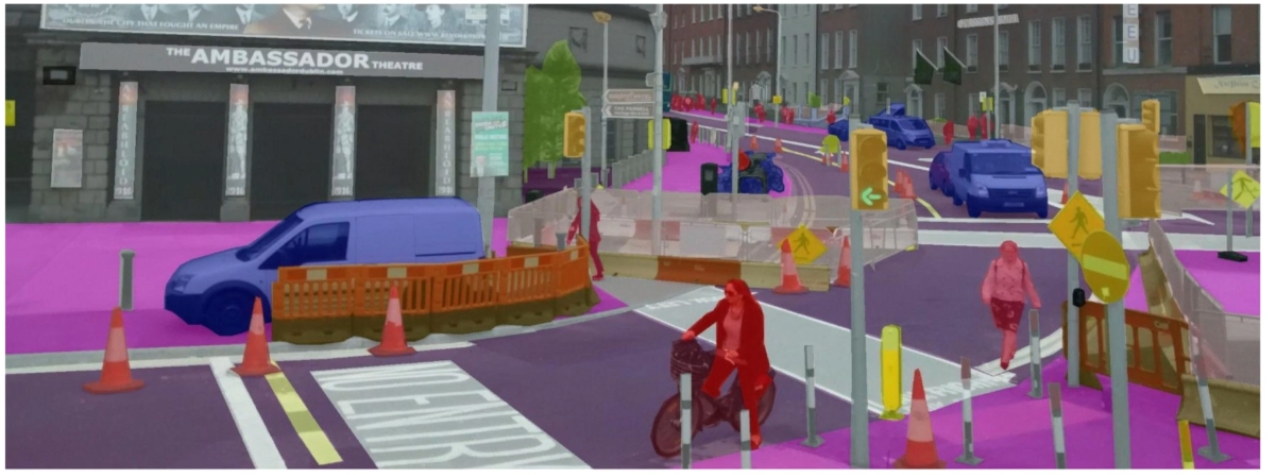

However, with the advent of deep learning, more advanced techniques have been developed for image segmentation. Some of the deep learning-based segmentation techniques include:

5. **Deep Learning-Based Segmentation**

- **Concept:** Deep learning-based segmentation involves using deep learning models to segment images. Convolutional Neural Networks (CNNs) are commonly used for image segmentation.



- **Common Architectures:**
    - **U-Net:** U-Net is a popular CNN architecture for image segmentation. It consists of an encoder and a decoder. The encoder downsamples the input image to extract features, while the decoder upsamples the features to generate the segmentation mask.
    - **Mask R-CNN:** Mask R-CNN is an extension of the Faster R-CNN object detection model that also generates segmentation masks for objects in an image.

- **Applications:**
    - Medical image segmentation
    - Autonomous driving
    - Object detection
    - Semantic segmentation
    - Scene understanding

### Types of Image Segmentation

1. **Semantic Segmentation**:

Semantic segmentation is the process of classifying each pixel in an image into a specific class. The goal of semantic segmentation is to assign a label to each pixel in an image such that pixels with the same label belong to the same object or region.

2. **Instance Segmentation**:

Instance segmentation is the process of detecting and segmenting individual objects in an image. The goal of instance segmentation is to assign a unique label to each object instance in an image.

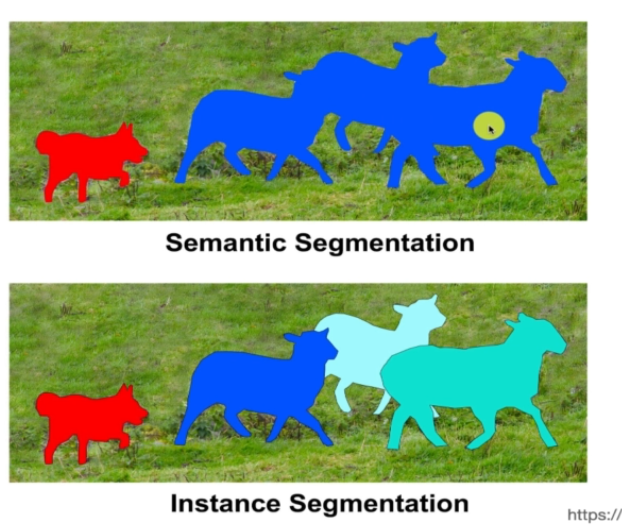

**For more information on image segmentation, you can check out the following resources:**
- https://manipulation.csail.mit.edu/segmentation.html

- https://www.analyticsvidhya.com/blog/2019/04/introduction-image-segmentation-techniques-python/

- https://www.researchgate.net/figure/Semantic-segmentation-left-and-instance-segmentation-right-8_fig1_339328277

for training segmentation models, we will need a dataset that contains images and their corresponding segmentation masks.
segmentation masks are images where each pixel is assigned a label corresponding to the object or region it belongs to.
there are several datasets available for image segmentation, such as the Pascal VOC dataset, the COCO dataset, and the Cityscapes dataset.

Creating segmentation masks can be a time-consuming process, as it requires manually labeling each pixel in an image. However, there are tools available that can help automate this process, such as the LabelMe tool, Roboflow, and Supervisely, among others.

**Annotation**

Annotation is the process of labeling data to create ground truth labels for training machine learning models. In the context of image segmentation, annotation involves labeling each pixel in an image with the corresponding object or region it belongs to.

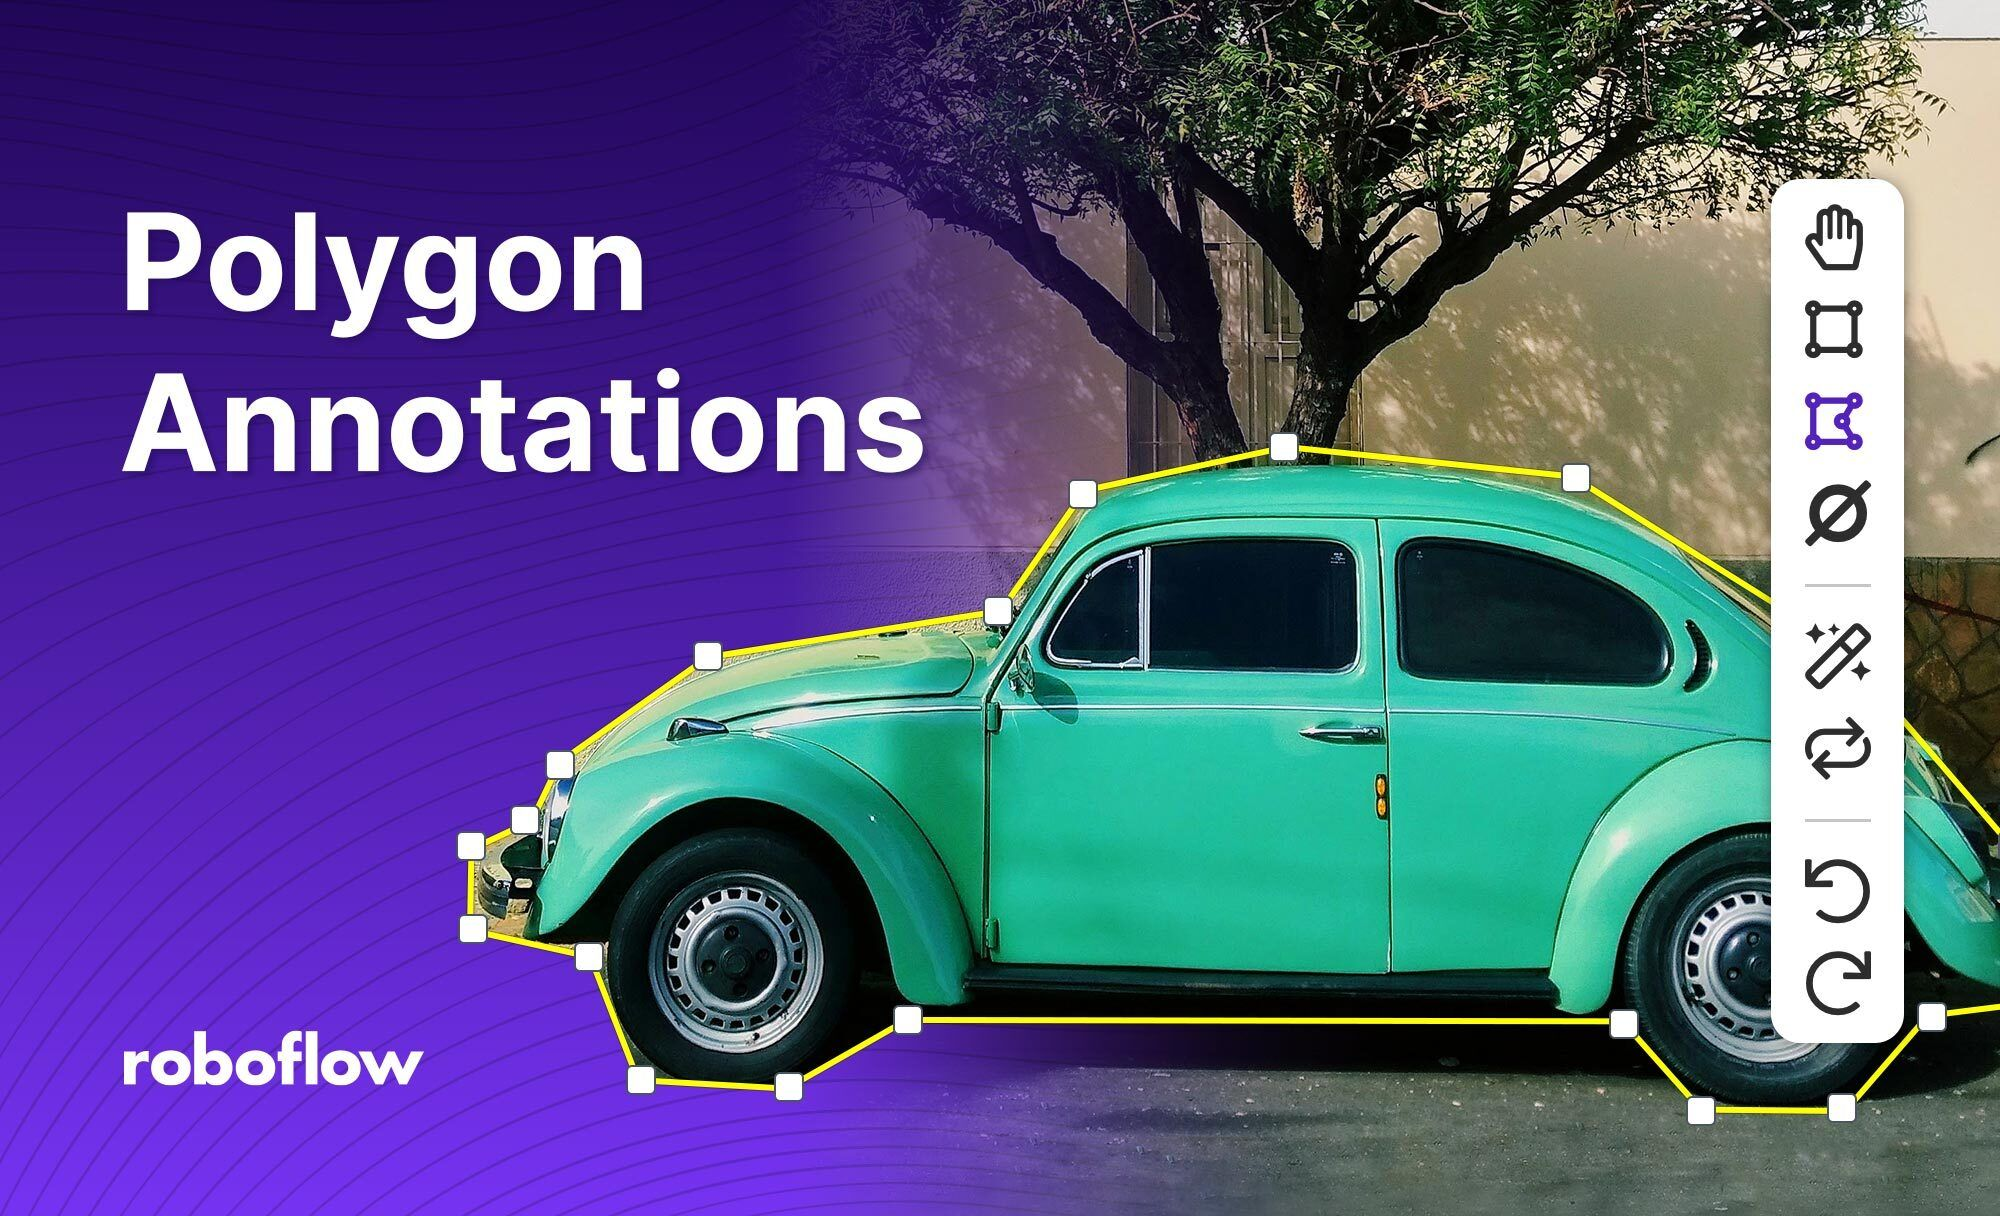